In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('sursaud-covid19-quotidien-2020-06-18-19h00-departement.csv')
# rad: retour a domicile
df_hosp = pd.read_csv('donnees-hospitalieres-nouveaux-covid19-2020-06-18-19h00.csv', sep=";")

In [21]:
df31 = df[df['dep'] == '31'].groupby('date_de_passage').sum()['nbre_hospit_corona']
df_hosp31 = df_hosp[df_hosp['dep'] == '31'].groupby('jour').sum()['incid_hosp']

dftot = df.groupby('date_de_passage').sum()['nbre_hospit_corona']

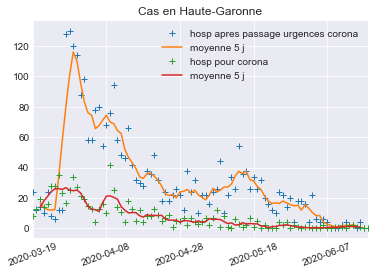

In [38]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    
    # select only data in the range of this DataFrame
    idx = df_hosp31.index
    
    #df31.cumsum().plot(marker='+', linestyle='', label='cas cumulés', ax=ax)
    df31[idx].plot(marker='+', linestyle='', label='hosp apres passage urgences corona', ax=ax)
    df31[idx].rolling(5, center=True).mean().plot(label='moyenne 5 j', ax=ax)

    df_hosp31.plot(marker='+', linestyle='', label='hosp pour corona', ax=ax)
    df_hosp31.rolling(5, center=True).mean().plot(label='moyenne 5 j', ax=ax)

    ax.set_xlabel('')

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)

    plt.grid()
    plt.legend()
    plt.title('Cas en Haute-Garonne')
    plt.savefig('covid31.png', dpi=150, bbox_inches='tight')
    plt.show()

In [40]:
pop = np.loadtxt('pop_insee_1erjan2020.txt', dtype=float)
poptot = sum(pop)
dep_list = np.loadtxt('dep.txt', dtype=str)
dep_nom = []
with open('dep_nom.txt', 'r') as f:
    dep_nom = [line[:-1] for line in f]
pop = dict(zip(dep_list, pop))
dep_nom = dict(zip(dep_list, dep_nom))

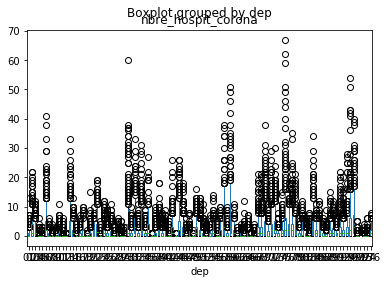

In [44]:
# average over last dates, per dep
data = df.set_index('date_de_passage').loc['2020-04-11':].groupby('dep').mean()
data = df.set_index('date_de_passage').loc['2020-04-11':]
data.boxplot(column='nbre_hospit_corona', by='dep', grid=False)
plt.show()

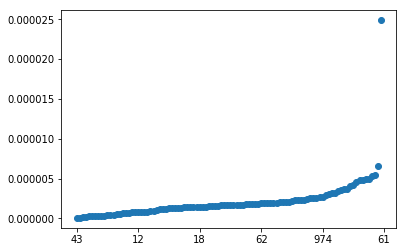

In [71]:
# average over last dates, per dep
data = df.set_index('date_de_passage').loc['2020-04-20':].groupby('dep').mean()

pop_per_dep = np.array([pop[dep] for dep in data.index])
data['frac_hospit_corona'] = data['nbre_hospit_corona']/pop_per_dep

deps = data.index.values
values = data['frac_hospit_corona'].values
o = np.argsort(values)
labels = deps[o]
values = values[o]

fig, ax = plt.subplots()
plt.plot(values, 'o')
ax.set_xticklabels(labels)

plt.show()

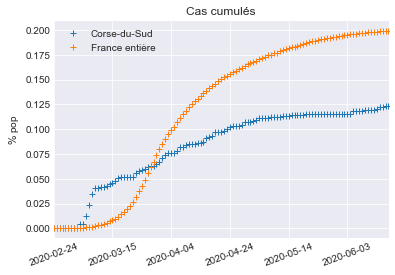

In [42]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    low_dep = []
    for dep in df['dep'].unique():
        cdf = df[df['dep'] == dep].groupby('date_de_passage').sum()['nbre_hospit_corona']
        # average derivative last days
        Nnew = cdf.iloc[-5:].mean()
        # index of first case
        ifirst = np.argmax(cdf.values)
        if 0 < Nnew/pop[dep] < 20*1e-6 and ifirst < 22:
            low_dep.append(dep)
            (100 * cdf.cumsum()/pop[dep]).plot(marker='+', linestyle='', label=f'{dep_nom[dep]}', ax=ax)

            
    # add tot for France
    (100 * dftot.cumsum()/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)

    ax.set_ylabel('$\%$ pop')    
    ax.set_xlabel('')
    plt.legend()

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)
    
    plt.grid()
    plt.title('Cas cumulés')
    plt.savefig('coviddep.png', dpi=150, bbox_inches='tight')

    plt.show()

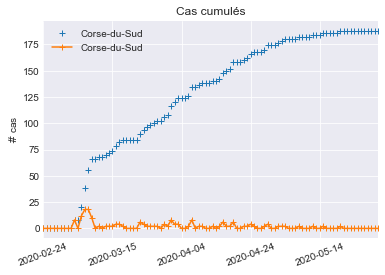

In [7]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    low_dep = []
    for dep in ['2A']: #, '974']:
        cdf = df[df['dep'] == dep].groupby('date_de_passage').sum()['nbre_hospit_corona']
        # average derivative last days
        Nnew = cdf.iloc[-5:].mean()
        cdf.cumsum().plot(marker='+', linestyle='', label=f'{dep_nom[dep]}', ax=ax)
        cdf.plot(marker='+', linestyle=None, label=f'{dep_nom[dep]}', ax=ax)
            
    # add tot for France
    #(100 * dftot.cumsum()/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)

    ax.set_ylabel('$\#$ cas')    
    ax.set_xlabel('')
    plt.legend()

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)
    
    plt.grid()
    plt.title('Cas cumulés')
    plt.savefig('covid_ex.png', dpi=150, bbox_inches='tight')

    plt.show()

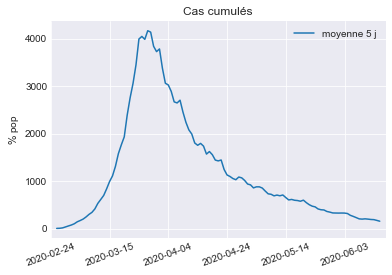

In [43]:
with plt.style.context(['seaborn-dark']):
    fig, ax = plt.subplots()
    low_dep = []
            
    # add tot for France
    #(100 * dftot.cumsum()/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)
    #(100 * dftot/poptot).plot(marker='+', linestyle='', label=f'France entière', ax=ax)
    #(100 * dftot/poptot).rolling(5, center=True).mean().plot(label='moyenne 5 j', ax=ax)
    (dftot).rolling(5, center=True).mean().plot(label='moyenne 5 j', ax=ax)

    ax.set_ylabel('$\%$ pop')    
    ax.set_xlabel('')
    plt.legend()

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_rotation(20)
        
    #ax.set_yscale('log')
    
    plt.grid()
    plt.title('Cas cumulés')
    plt.savefig('covid_ex.png', dpi=150, bbox_inches='tight')

    plt.show()